In [1]:
import os
import sys
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice

# Vertex Count

    Change!!
    In this script, I will analyze the vertex count in a Cairo Lattice if we increse linearly up from 0 mT to 25 mT with a rate of 0.0125 mT/s (2000 s) and then mantaining the magnetic field constant (25 mT). Then, we are analyzing the output data of Script-8.1.
    


In [2]:
#rate = 25/2000

In [3]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-12.0"

In [4]:
Shakti = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp*.dat'):
        print(file)
        Shakti.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Shakti = []
for i in range(len(Shakti)):
    keys_Shakti.append(i)

ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp5.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp0.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp9.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp4.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp3.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp6.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp1.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp2.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp7.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp8.dat


In [5]:
Shakti_exp = pd.concat(Shakti, keys = keys_Shakti)

In [6]:
Shakti_exp.index.names = ['Exp', 'frame', 'id']

In [7]:
Shakti_exp

x            y  coordination  charge   dx   dy
Exp frame id                                                            
0   0     0      -28.384776   -56.769553             3       3 -1.0  0.0
          1     1107.006276  1021.851947             3      -1  1.0  0.0
          2     1050.236724  1050.236724             2       2  1.0  1.0
          3      965.082395   709.619408             3       3  0.0 -1.0
          4      823.158513  1021.851947             3      -3  1.0  0.0
...                     ...          ...           ...     ...  ...  ...
9   2495  1232  1107.006276   709.619408             2       0  1.0 -1.0
          1233   652.849855   -85.154329             2       0  1.0  1.0
          1234   -28.384776   936.697618             2       0  1.0 -1.0
          1235   -28.384776   823.158513             2       0 -1.0  1.0
          1236   -28.384776   766.388960             2       0  1.0  1.0

[6185000 rows x 6 columns]

### Filter the vertices at the boundaries 

In [8]:
First_frame = Shakti_exp.loc[0,0]

In [9]:
x_min = 100
y_min = 50

width = 900
hight = 900

x_max = x_min+width
y_max = y_min+hight

print(x_min,x_max,y_min,y_max)

100 1000 50 950


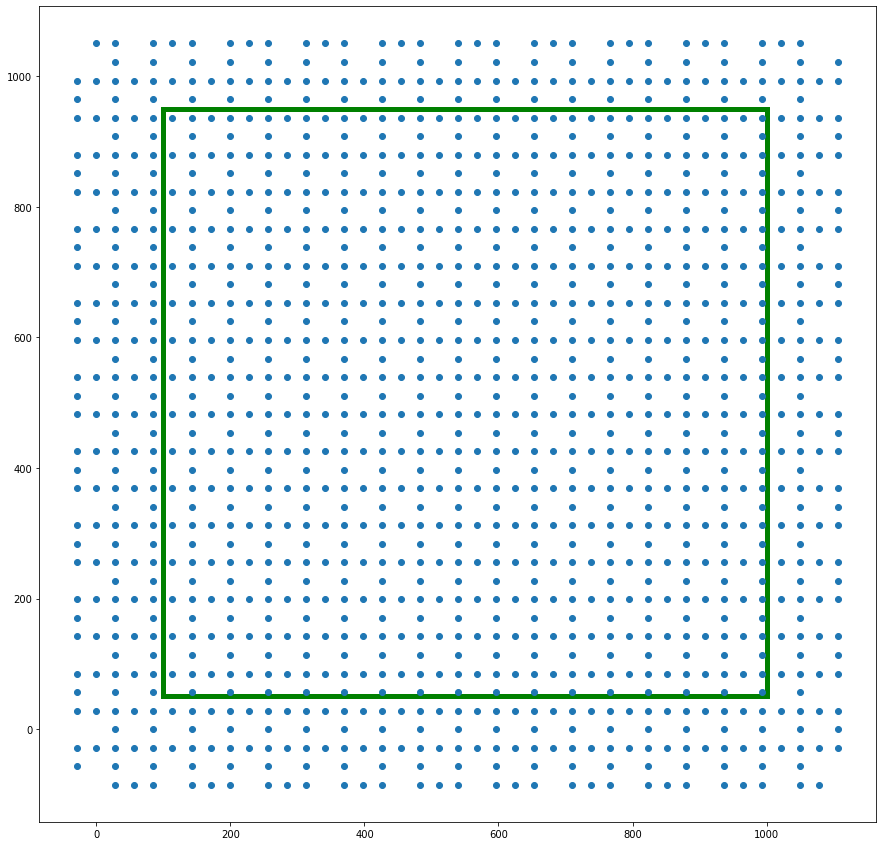

In [10]:
from matplotlib.patches import Rectangle
fig =plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)

plt.plot(First_frame.x, First_frame.y , 'o')
ax.add_patch(Rectangle((x_min, y_min),width, hight,fc ='none', ec ='g',lw = 5))

In [11]:
Ca = Shakti_exp.loc[(Shakti_exp['x']<x_max) & (Shakti_exp['x']>x_min)]
Shakti_exp = Ca.loc[(Ca['y']<y_max) & (Ca['y']>y_min)]

In [12]:
Shakti_exp

x           y  coordination  charge   dx   dy
Exp frame id                                                          
0   0     3     965.082395  709.619408             3       3  0.0 -1.0
          10    993.467171  113.539105             3       3  1.0  0.0
          14    454.156421  482.541197             3       1  2.0  1.0
          16    482.541197  482.541197             4       0  2.0 -2.0
          17    510.925974  482.541197             3       3  0.0 -1.0
...                    ...         ...           ...     ...  ...  ...
9   2495  1200  255.462987  312.232539             4      -2  0.0 -2.0
          1201  539.310750  681.234631             3      -1 -1.0  2.0
          1202  567.695526  709.619408             3       3  0.0  1.0
          1203  255.462987  340.617316             3       1 -1.0 -2.0
          1204  596.080303  738.004184             3       1  1.0  2.0

[3840000 rows x 6 columns]

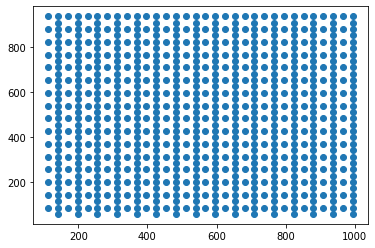

In [13]:
plt.plot(Shakti_exp.loc[0,0].x,Shakti_exp.loc[0,0].y,'o')

### Classify vertices

In [14]:
Shakti_exp["type"] = np.NaN

# 4-fold vertices classification

Shakti_exp.loc[Shakti_exp.charge==-4, "type"] = "Q = -4"
Shakti_exp.loc[Shakti_exp.charge==-2, "type"] = "Q = -2"
Shakti_exp.loc[Shakti_exp.charge==+2, "type"] = "Q = +2"
Shakti_exp.loc[Shakti_exp.charge==+4, "type"] = "Q = +4"

zeroq = Shakti_exp.charge==0

dipole_magnitude = np.sqrt(Shakti_exp[zeroq].dx**2+Shakti_exp[zeroq].dy**2)

Shakti_exp.loc[zeroq & (dipole_magnitude<1), "type"] = "Q = 0"
Shakti_exp.loc[zeroq & (dipole_magnitude>2) , "type"] = "Q = 0"

# 3-fold vertices classification

Shakti_exp.loc[Shakti_exp.charge==+1, "type"] = "Q = +1"
Shakti_exp.loc[Shakti_exp.charge==-1, "type"] = "Q = -1"
Shakti_exp.loc[Shakti_exp.charge==+3, "type"] = "Q = +3"
Shakti_exp.loc[Shakti_exp.charge==-3, "type"] = "Q = -3"

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
Shakti_exp =Shakti_exp.query('coordination == 4 or coordination == 3')

In [16]:
Shakti_exp

x           y  coordination  charge   dx   dy    type
Exp frame id                                                                  
0   0     3     965.082395  709.619408             3       3  0.0 -1.0  Q = +3
          10    993.467171  113.539105             3       3  1.0  0.0  Q = +3
          14    454.156421  482.541197             3       1  2.0  1.0  Q = +1
          16    482.541197  482.541197             4       0  2.0 -2.0   Q = 0
          17    510.925974  482.541197             3       3  0.0 -1.0  Q = +3
...                    ...         ...           ...     ...  ...  ...     ...
9   2495  1200  255.462987  312.232539             4      -2  0.0 -2.0  Q = -2
          1201  539.310750  681.234631             3      -1 -1.0  2.0  Q = -1
          1202  567.695526  709.619408             3       3  0.0  1.0  Q = +3
          1203  255.462987  340.617316             3       1 -1.0 -2.0  Q = +1
          1204  596.080303  738.004184             3       1  1.0  2.0  Q = +1

[3840000 rows x 7 columns]

### Observing what's happening in count_vertices()

In [17]:
def count_vertices(vrt, exp = 'Exp', column = "type", column1 = "coordination", time = "frame"):
    vrt_count = vrt.groupby([exp,time,column,column1]).count().iloc[:,0].to_frame("number")

    vrt_count = vrt_count.reindex(pd.MultiIndex.from_product(
        [vrt_count.index.get_level_values(exp).unique(),
        vrt_count.index.get_level_values(time).unique(),
        vrt_count.index.get_level_values(column).unique(),
        vrt_count.index.get_level_values(column1).unique()]), fill_value = 0)

    total_vrt = vrt_count.groupby([exp,time,column1]).sum()
    array_coord = total_vrt.loc[vrt_count.index.get_level_values('frame')].number.values
    array_coordT = np.tile(array_coord,9*10)# 9 types of charges and 10 experiments 
    vrt_count["fraction"] = vrt_count.number / array_coordT
        
    return vrt_count

In [18]:
vrt_count = Shakti_exp.groupby(['Exp','frame','type','coordination']).count().iloc[:,0].to_frame("number")
vrt_count

number
Exp frame type   coordination        
0   0     Q = +1 3                181
          Q = +2 4                 69
          Q = +3 3                 58
          Q = +4 4                 16
          Q = -1 3                213
...                               ...
9   2495  Q = +3 3                138
          Q = -1 3                 71
          Q = -2 4                185
          Q = -4 4                 70
          Q = 0  4                  1

[31470 rows x 1 columns]

In [19]:
vrt_count = vrt_count.reindex(pd.MultiIndex.from_product(
        [vrt_count.index.get_level_values('Exp').unique(),
        vrt_count.index.get_level_values('frame').unique(),
        vrt_count.index.get_level_values('type').unique(),
        vrt_count.index.get_level_values('coordination').unique()]), fill_value = 0)
vrt_count

number
Exp frame type   coordination        
0   0     Q = +1 3                181
                 4                  0
          Q = +2 3                  0
                 4                 69
          Q = +3 3                 58
...                               ...
9   2495  Q = -3 4                  0
          Q = -4 3                  0
                 4                 70
          Q = 0  3                  0
                 4                  1

[90000 rows x 1 columns]

In [20]:
total_vrt = vrt_count.groupby(['Exp','frame','coordination']).sum()
total_vrt

number
Exp frame coordination        
0   0     3                512
          4                256
    5     3                512
          4                256
    10    3                512
...                        ...
9   2485  4                256
    2490  3                512
          4                256
    2495  3                512
          4                256

[10000 rows x 1 columns]

In [26]:
array_coord = total_vrt.loc[vrt_count.index.get_level_values('frame')].number.values
array_coord, len(array_coord)

(array([512, 256, 512, ..., 256, 512, 256]), 2000)

In [27]:
array_coordT = np.tile(array_coord,45)
array_coordT, len(array_coordT)

(array([512, 256, 512, ..., 256, 512, 256]), 90000)

In [28]:
vrt_count.number

Exp  frame  type    coordination
0    0      Q = +1  3               181
                    4                 0
            Q = +2  3                 0
                    4                69
            Q = +3  3                58
                                   ... 
9    2495   Q = -3  4                 0
            Q = -4  3                 0
                    4                70
            Q = 0   3                 0
                    4                 1
Name: number, Length: 90000, dtype: int64

In [29]:
vrt_count.number / array_coordT

Exp  frame  type    coordination
0    0      Q = +1  3               0.353516
                    4               0.000000
            Q = +2  3               0.000000
                    4               0.269531
            Q = +3  3               0.113281
                                      ...   
9    2495   Q = -3  4               0.000000
            Q = -4  3               0.000000
                    4               0.273438
            Q = 0   3               0.000000
                    4               0.003906
Name: number, Length: 90000, dtype: float64

In [58]:
vrt_count.loc[0].number
#vrt_count.number / array_coordT

frame  type    coordination
0      Q = +1  3               181
               4                 0
       Q = +2  3                 0
               4                69
       Q = +3  3                58
                              ... 
2495   Q = -3  4                 0
       Q = -4  3                 0
               4                66
       Q = 0   3                 0
               4                 0
Name: number, Length: 9000, dtype: int64

In [59]:
vrt_count.index.get_level_values('frame').unique()

Int64Index([   0,    5,   10,   15,   20,   25,   30,   35,   40,   45,
            ...
            2450, 2455, 2460, 2465, 2470, 2475, 2480, 2485, 2490, 2495],
           dtype='int64', name='frame', length=500)

In [49]:
9*500*2

9000

In [60]:
total_vrt

number
Exp frame type   coordination        
0   0     Q = +1 3                181
                 4                  0
          Q = +2 3                  0
                 4                 69
          Q = +3 3                 58
...                               ...
9   2495  Q = -3 4                  0
          Q = -4 3                  0
                 4                 70
          Q = 0  3                  0
                 4                  1

[90000 rows x 1 columns]

In [19]:
count_vertices(Shakti_exp)

ValueError: operands could not be broadcast together with shapes (90000,) (180000,) 

### End 

### Route 1: From here I will try another method to count the vertices.

In [17]:
def count_vertices(vrt, exp = 'Exp', column = "type", column1 = "coordination", time = "frame"):
    vrt_count = vrt.groupby([exp,time,column,column1]).count().iloc[:,0].to_frame("number")

    vrt_count = vrt_count.reindex(pd.MultiIndex.from_product(
        [vrt_count.index.get_level_values(exp).unique(),
        vrt_count.index.get_level_values(time).unique(),
        vrt_count.index.get_level_values(column).unique(),
        vrt_count.index.get_level_values(column1).unique()]), fill_value = 0)

    total_vrt = vrt_count.groupby([exp,time,column1]).sum()
    array_coord = total_vrt.loc[vrt_count.index.get_level_values('frame')].number.values
    array_coordT = np.tile(array_coord,45)# 9 types of charges and 10 experiments 
    vrt_count["fraction"] = vrt_count.number / array_coordT
        
    return vrt_count

In [18]:
count_m = count_vertices(Shakti_exp)

    the err of the fraction is missing...

In [19]:
v_counts_m = count_m.groupby(["frame","type","coordination"]).mean()
v_counts_m["err"] = count_m['fraction'].groupby(["frame","type","coordination"]).std()/np.sqrt(count_m['fraction'].groupby(["frame","type","coordination"]).count().values)

    I have to drop the rows without fraction of charge. 

In [20]:
v_counts_m

number  fraction       err
frame type   coordination                            
0     Q = +1 3              183.3  0.358008  0.008769
             4                0.0  0.000000  0.000000
      Q = +2 3                0.0  0.000000  0.000000
             4               63.6  0.248438  0.007530
      Q = +3 3               67.5  0.131836  0.003284
...                           ...       ...       ...
2495  Q = -3 4                0.0  0.000000  0.000000
      Q = -4 3                0.0  0.000000  0.000000
             4               83.2  0.325000  0.008827
      Q = 0  3                0.0  0.000000  0.000000
             4                1.8  0.007031  0.001823

[9000 rows x 3 columns]

    Dropping rows with zero values:

In [21]:
v_counts_m = v_counts_m[(v_counts_m != 0).all(1)]

In [22]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"])

In [23]:
v_counts_m['time'] = v_counts_m.index.get_level_values('frame')

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


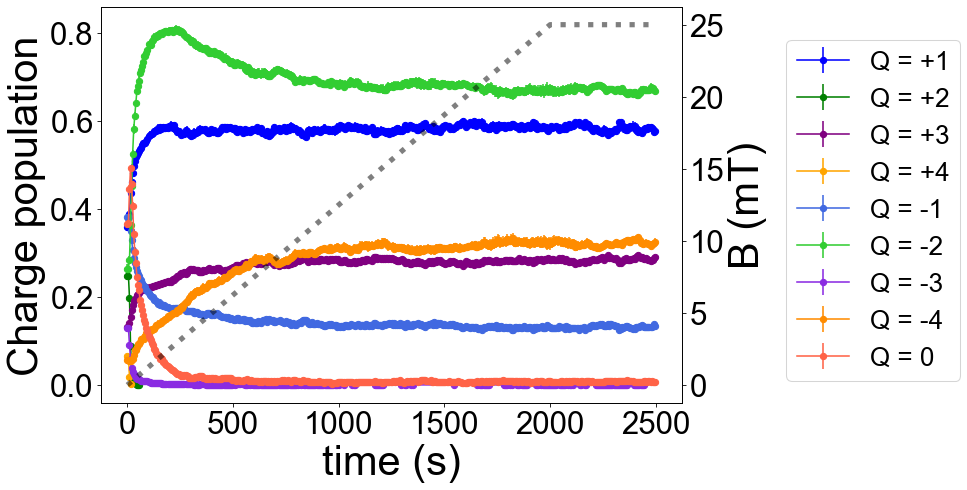

In [24]:
fig, ax1 = plt.subplots(figsize=(10,7))

ax2 = ax1.twinx()



for typ_m, mtype in v_counts_m.groupby('type'):
    
    ax1.errorbar(mtype['time'], mtype["fraction"],yerr = mtype["err"], fmt ='-o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.5, 0.95))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.5, lw = 5)


ax2.set_ylabel('B (mT)', size = 40)
ax2.tick_params(axis='y', labelsize=30)

#v_counts_m.to_csv('FreeBound.dat', sep = "\t")

plt.show()

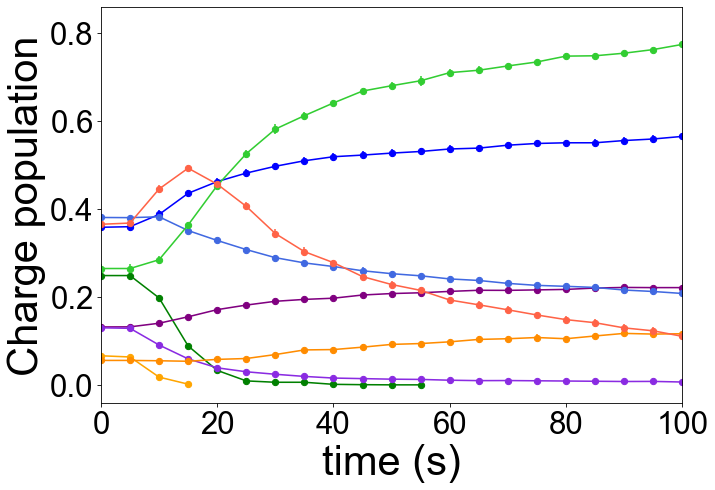

In [25]:
fig, ax1 = plt.subplots(figsize=(10,7))

for typ_m, mtype in v_counts_m.groupby('type'):
    
    ax1.errorbar(mtype['time'], mtype["fraction"],yerr = mtype["err"], fmt ='-o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  
#ax1.legend(fontsize = 25)

#ax1.legend(fontsize = 25, bbox_to_anchor=(1, 0.305))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

plt.xlim(0,100)

#v_counts_m.to_csv('FreeBound.dat', sep = "\t")

plt.show()